<a href="https://colab.research.google.com/github/Selectallfrom/Analysis-of-the-bank-s-credit-cards-offers/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%B5%D0%B4%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам

**Шаг 5.** Построить классификационные модели
- Построить несколько моделей классификации и сравнить их.    
- исследовать возможные зависимости между признаками;

Дополнительное задание (выполнение по желанию):  построить классификационные модели для прогнозирования значений целевой переменной.

#Шаг 1. Загрузка данных;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv('/content/drive/MyDrive/Projects/ВКР/vkr_dataset_open_credit_card.csv')
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.0,3.0,15,59998,10,"0,770249",2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0,2016-02-16 18:54:34
1,2,1,28.0,NaN,15,10889,6,"0,248514",2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0,2016-02-15 12:39:04
2,3,2,32.0,3.0,14,10728,12,"0,459589",4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0,2015-01-27 18:57:19
3,4,1,27.0,2.0,14,"12009,09",12,"0,362536",2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0,2019-05-02 17:57:10
4,5,2,45.0,3.0,14,"16908,89",10,"0,421385",4.0,2,77.0,6.0,26620.0,NaN,1.0,0.0,0,2015-09-22 16:28:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,1,27.0,4.0,14,64867,12,"0,535257",2.0,2,57.0,2.0,27060.0,40000.0,6.0,0.0,0,2018-11-24 18:35:26
170742,170743,1,24.0,3.0,14,17640,6,"0,573287",4.0,28,63.0,3.0,45430.0,30000.0,1.0,0.0,0,2018-06-08 16:06:39
170743,170744,1,31.0,4.0,14,"27556,47",10,"0,416098",2.0,19,41.0,1.0,33990.0,40000.0,1.0,0.0,0,2016-09-24 12:18:06
170744,170745,1,53.0,2.0,10,6189,12,"0,482595",4.0,2,39.0,2.0,22990.0,31000.0,2.0,0.0,0,2017-11-05 18:57:58


Датасет имеет 170746 строк и 18 колонок

#Шаг 2. Первичная обработка данных (при необходимости):

скорректировать заголовки;
скорректировать типы признаков;
проверить наличие дублирующихся записей;
проверить наличие аномальных значений;
восстановить пропущенные значения;

In [ ]:
#скорректировать заголовки;
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

заголовки не требуют корректировки

In [ ]:
#восстановить пропущенные значения;
df.isna().sum() # выводим колличество пропусков по столбцам

client_id                  0
gender                     0
age                        2
marital_status             5
job_position               0
credit_sum                 1
credit_month               0
score_shk                  3
education                  3
tariff_id                  0
living_region            192
okrug                    192
avregzarplata            192
monthly_income             2
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
date_bank                  0
dtype: int64

в данном случае пропуски лучше удалить, но перед этим проверим, что это существенно не сократит целевой показатель открытия кредитной карты

In [ ]:
A = set(df[df.open_account_flg == 1].client_id)
B = set(df[df.credit_count == 'NaN'].client_id)
len(A.intersection(B))

0

In [ ]:
A = set(df[df.open_account_flg == 1].client_id)
B = set(df[df.overdue_credit_count == 'NaN'].client_id)
len(A.intersection(B))

0

In [ ]:
df = df.dropna()
df.isna().sum() # выводим колличество пропусков по столбцам

client_id               0
gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
score_shk               0
education               0
tariff_id               0
living_region           0
okrug                   0
avregzarplata           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
date_bank               0
dtype: int64

In [ ]:
#скорректировать типы признаков;
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161327 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             161327 non-null  int64  
 1   gender                161327 non-null  int64  
 2   age                   161327 non-null  float64
 3   marital_status        161327 non-null  float64
 4   job_position          161327 non-null  int64  
 5   credit_sum            161327 non-null  object 
 6   credit_month          161327 non-null  int64  
 7   score_shk             161327 non-null  object 
 8   education             161327 non-null  float64
 9   tariff_id             161327 non-null  int64  
 10  living_region         161327 non-null  float64
 11  okrug                 161327 non-null  float64
 12  avregzarplata         161327 non-null  float64
 13  monthly_income        161327 non-null  float64
 14  credit_count          161327 non-null  float64
 15  

In [ ]:
df['date_bank'] = pd.to_datetime(df['date_bank'], origin='unix')

<ipython-input-9-3f38fed05f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_bank'] = pd.to_datetime(df['date_bank'], origin='unix')


In [ ]:
df.credit_sum = df.credit_sum.str.replace(',','.')
df.score_shk = df.score_shk.str.replace(',','.')

<ipython-input-10-4a33d54dd379>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.credit_sum = df.credit_sum.str.replace(',','.')
<ipython-input-10-4a33d54dd379>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.score_shk = df.score_shk.str.replace(',','.')


In [ ]:
#скорректировать типы признаков;
data_types_dict = {'age': int, 'marital_status': int, 'credit_sum' : float,
                   'credit_month' : int, 'score_shk' : float,
                   'education': int, 'tariff_id': int,
                   'living_region': int, 'okrug': int,
                   'credit_count': int, 'overdue_credit_count': int}
df = df.astype(data_types_dict)
df.dtypes

client_id                        int64
gender                           int64
age                              int64
marital_status                   int64
job_position                     int64
credit_sum                     float64
credit_month                     int64
score_shk                      float64
education                        int64
tariff_id                        int64
living_region                    int64
okrug                            int64
avregzarplata                  float64
monthly_income                 float64
credit_count                     int64
overdue_credit_count             int64
open_account_flg                 int64
date_bank               datetime64[ns]
dtype: object

In [ ]:
#проверить наличие дублирующихся записей;
df.duplicated().sum()

0

дублей нет

In [ ]:
print(f"""Количество дублирующихся записей равно {df.duplicated().sum()}.
Это составляет {df.duplicated().sum()/df.shape[0]:.2%}.""")

Количество дублирующихся записей равно 0.
Это составляет 0.00%.


In [ ]:
#проверить наличие аномальных значений;
#для количественных признаков проверим минимальные и максимальные значения, а также распределение по перцентилям
per = [0.01, 0.05, 0.25, 0.5, 0.6, 0.75, 0.8, 0.95, 0.99]
df.describe(percentiles=per)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.00000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000
mean,85371.322271,1.478748,37.043334,3.176926,13.158275,25933.71104,10.990783,0.464983,3.188406,13.947709,43.047915,4.808557,32877.024801,40415.741587,2.107527,0.046068,0.164913
std,49273.771747,0.499550,10.400518,0.735694,3.131034,16192.65240,3.542908,0.122025,1.060878,11.517184,22.255026,2.261814,12517.980482,25327.189954,1.777408,0.211517,0.371104
min,1.000000,1.000000,18.000000,1.000000,1.000000,2736.00000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
1%,1738.260000,1.000000,21.000000,1.000000,1.000000,4990.00000,4.000000,0.208422,2.000000,1.000000,3.000000,1.000000,17490.000000,11000.000000,0.000000,0.000000,0.000000
5%,8575.300000,1.000000,24.000000,2.000000,4.000000,8029.00000,6.000000,0.277135,2.000000,2.000000,7.000000,2.000000,20130.000000,15000.000000,0.000000,0.000000,0.000000
25%,42700.500000,1.000000,29.000000,3.000000,14.000000,14828.00000,10.000000,0.376793,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,85374.000000,1.000000,35.000000,3.000000,14.000000,21077.00000,10.000000,0.457566,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
60%,102426.600000,2.000000,38.000000,3.000000,14.000000,24650.20000,10.000000,0.490006,4.000000,20.000000,55.000000,6.000000,28820.000000,40000.000000,2.000000,0.000000,0.000000
75%,128060.500000,2.000000,43.000000,4.000000,14.000000,31768.00000,12.000000,0.546254,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000


In [ ]:
df.describe()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.00000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000
mean,85371.322271,1.478748,37.043334,3.176926,13.158275,25933.71104,10.990783,0.464983,3.188406,13.947709,43.047915,4.808557,32877.024801,40415.741587,2.107527,0.046068,0.164913
std,49273.771747,0.499550,10.400518,0.735694,3.131034,16192.65240,3.542908,0.122025,1.060878,11.517184,22.255026,2.261814,12517.980482,25327.189954,1.777408,0.211517,0.371104
min,1.000000,1.000000,18.000000,1.000000,1.000000,2736.00000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
25%,42700.500000,1.000000,29.000000,3.000000,14.000000,14828.00000,10.000000,0.376793,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,85374.000000,1.000000,35.000000,3.000000,14.000000,21077.00000,10.000000,0.457566,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,128060.500000,2.000000,43.000000,4.000000,14.000000,31768.00000,12.000000,0.546254,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,2.000000,71.000000,5.000000,18.000000,200000.00000,36.000000,0.976126,5.000000,33.000000,82.000000,8.000000,66880.000000,950000.000000,21.000000,3.000000,1.000000


кредитный счет имеют очень мало клиентов - менее 20 %, просроченных кредитов менее 5 %

In [ ]:
#из качественных проверим пол и количество просроченных кредитов
df.groupby(['gender']).agg(count = ('client_id', 'count'))

,count
gender,
1,84092
2,77235


In [ ]:
df.groupby(['overdue_credit_count']).agg(count = ('client_id', 'count'))

,count
overdue_credit_count,
0,153954
1,7319
2,49
3,5


признаки пол и количество просроченных кредитов подозрительными не выглядят

In [ ]:
#разделим признаки на непрерывные и категориальные
vars_cont = ['credit_sum', 'avregzarplata', 'monthly_income', 'score_shk']
vars_cat = ['gender', 'age', 'marital_status', 'job_position', 'credit_month',
            'education', 'tariff_id', 'living_region', 'okrug',
            'credit_count', 'overdue_credit_count', 'open_account_flg']
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

In [ ]:
# просмотр уникальных значений признаков
for col in vars_cat:
    print(f'---- начало признака {col} ----')
    #print(df.groupby([col]).agg(count = ('client_id', 'count')))
    print(df[col].value_counts().sort_index())
    print(f'---- конец признака {col} ----')
    print()

---- начало признака gender ----
1    84092
2    77235
Name: gender, dtype: int64
---- конец признака gender ----

---- начало признака age ----
18       7
19     123
20     403
21    1129
22    2409
23    3425
24    4685
25    5560
26    6403
27    6748
28    7227
29    7231
30    7072
31    6576
32    6469
33    6410
34    5739
35    5506
36    5303
37    5131
38    5040
39    4916
40    4831
41    4543
42    4280
43    4010
44    3717
45    3167
46    3175
47    2824
48    2585
49    2331
50    2332
51    1938
52    1960
53    1904
54    1772
55    1781
56    1514
57    1401
58    1224
59    1052
60     941
61     825
62     760
63     631
64     552
65     463
66     361
67     361
68     234
69     177
70     138
71      31
Name: age, dtype: int64
---- конец признака age ----

---- начало признака marital_status ----
1     3976
2    16558
3    91166
4    46201
5     3426
Name: marital_status, dtype: int64
---- конец признака marital_status ----

---- начало признака job_position -

<ipython-input-20-a01e7a8ed37a>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i)


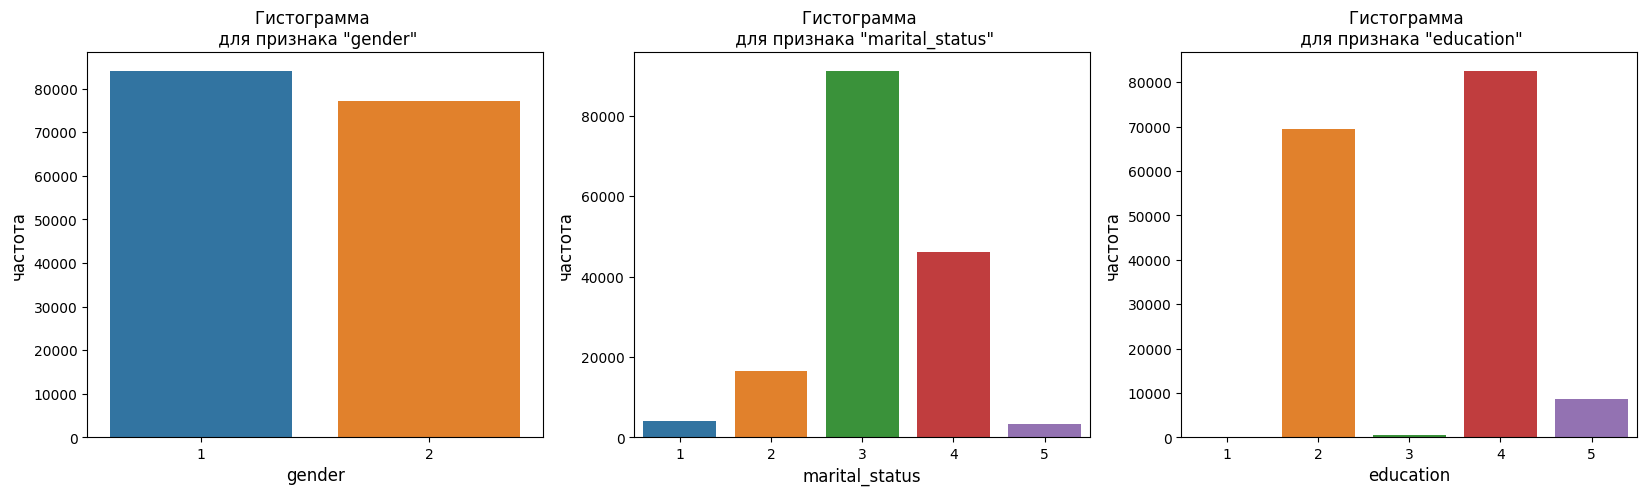

In [ ]:
#Для каждого из категориальных признаков постройм столбчатую диаграмму
cols_dist = ['gender', 'marital_status', 'education']
fig, axes = plt.subplots(1,figsize=(20,5))
i=1
for col in cols_dist:
    plt.subplot(1,3,i)
    sns.countplot(x=col, data=df)
    plt.title(f'Гистограмма \n для признака "{col}"')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.ylabel('частота', fontsize = 12)
    i=i+1

<ipython-input-21-6e79b5434c97>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i)


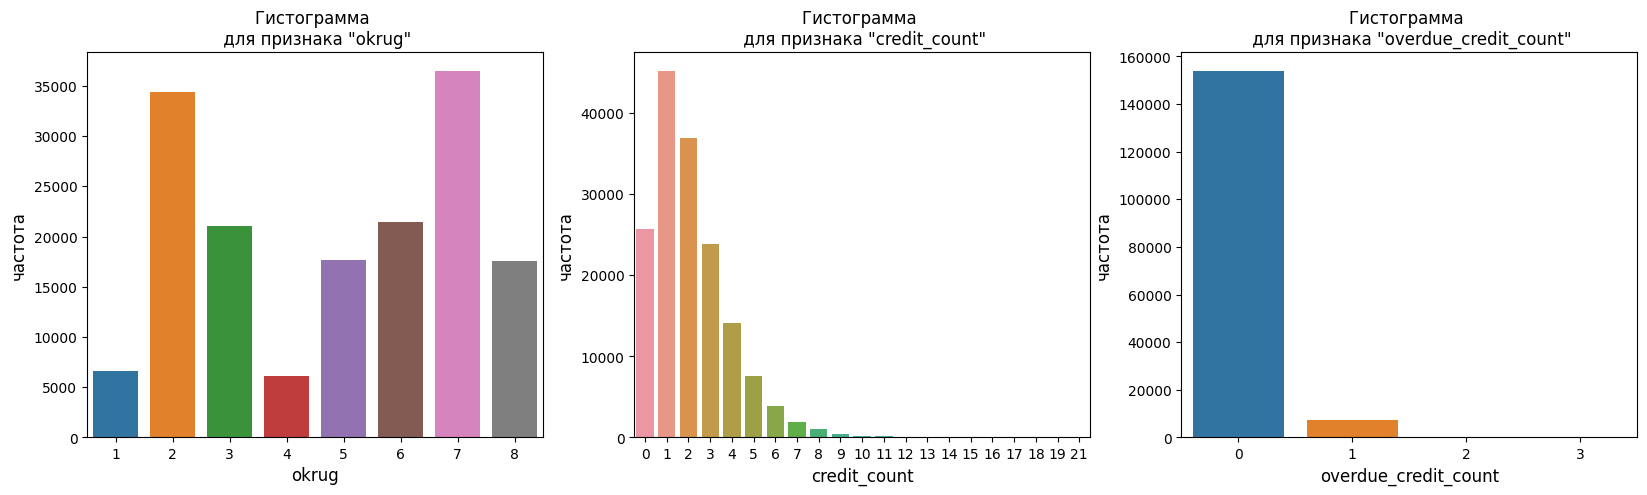

In [ ]:
cols_dist = ['okrug','credit_count', 'overdue_credit_count']
fig, axes = plt.subplots(1,figsize=(20,5))
i=1
for col in cols_dist:
    plt.subplot(1,3,i)
    sns.countplot(x=col, data=df)
    plt.title(f'Гистограмма \n для признака "{col}"')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.ylabel('частота', fontsize = 12)
    i=i+1

Text(0, 0.5, 'частота')

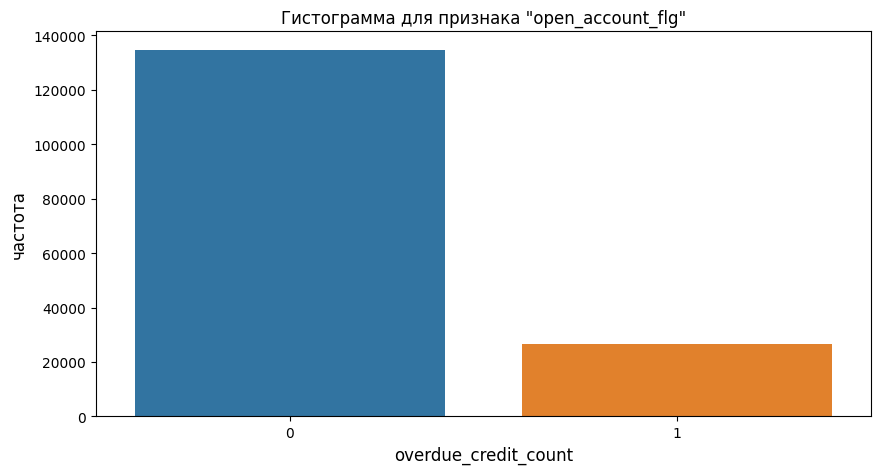

In [ ]:
fig, axes = plt.subplots(1,figsize=(10,5))
sns.countplot(x=df.open_account_flg, data=df)
plt.title('Гистограмма для признака "open_account_flg"')
plt.xlabel(f'{col}', fontsize = 12)
plt.ylabel('частота', fontsize = 12)

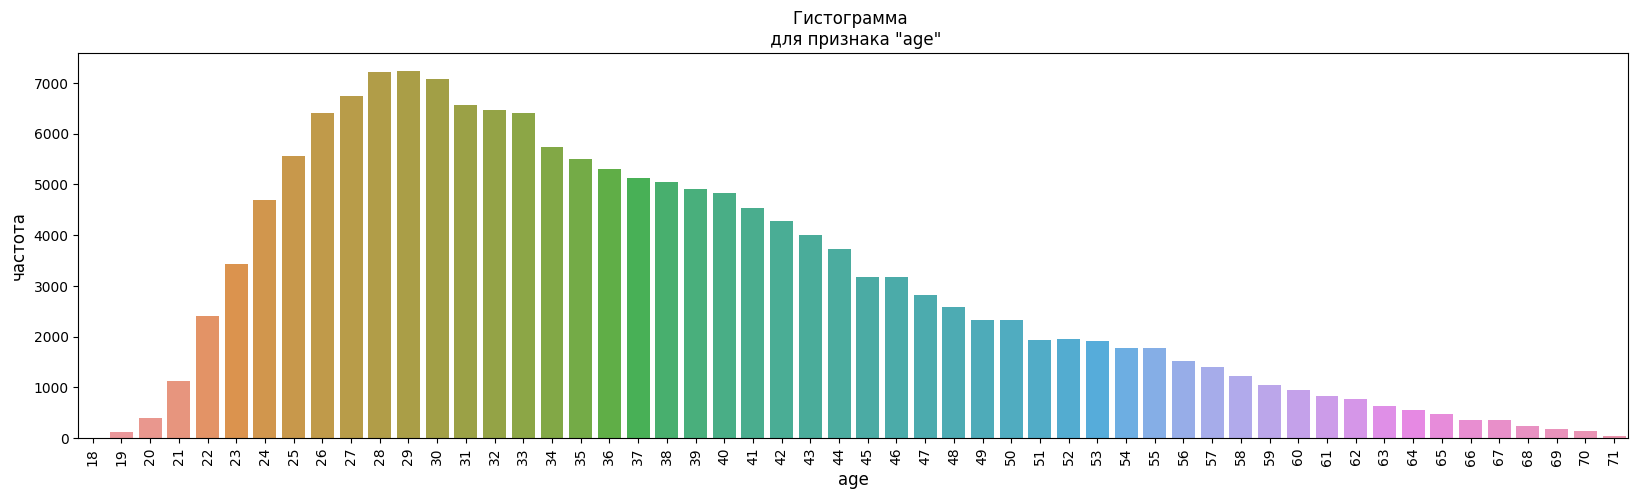

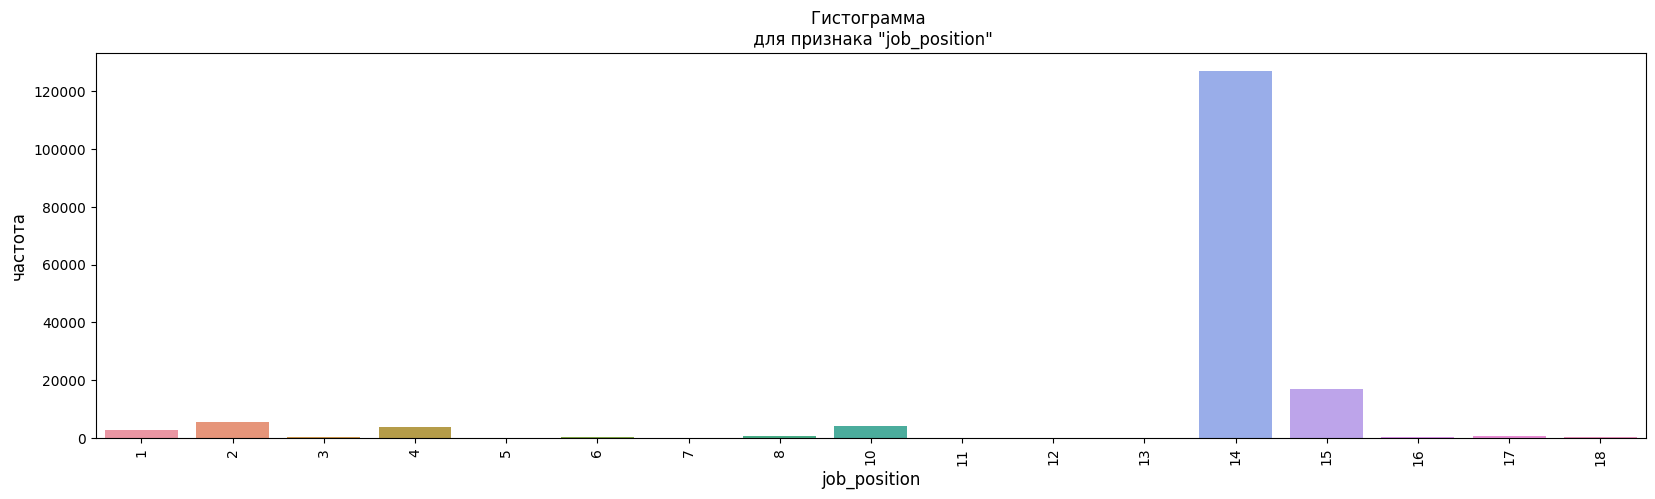

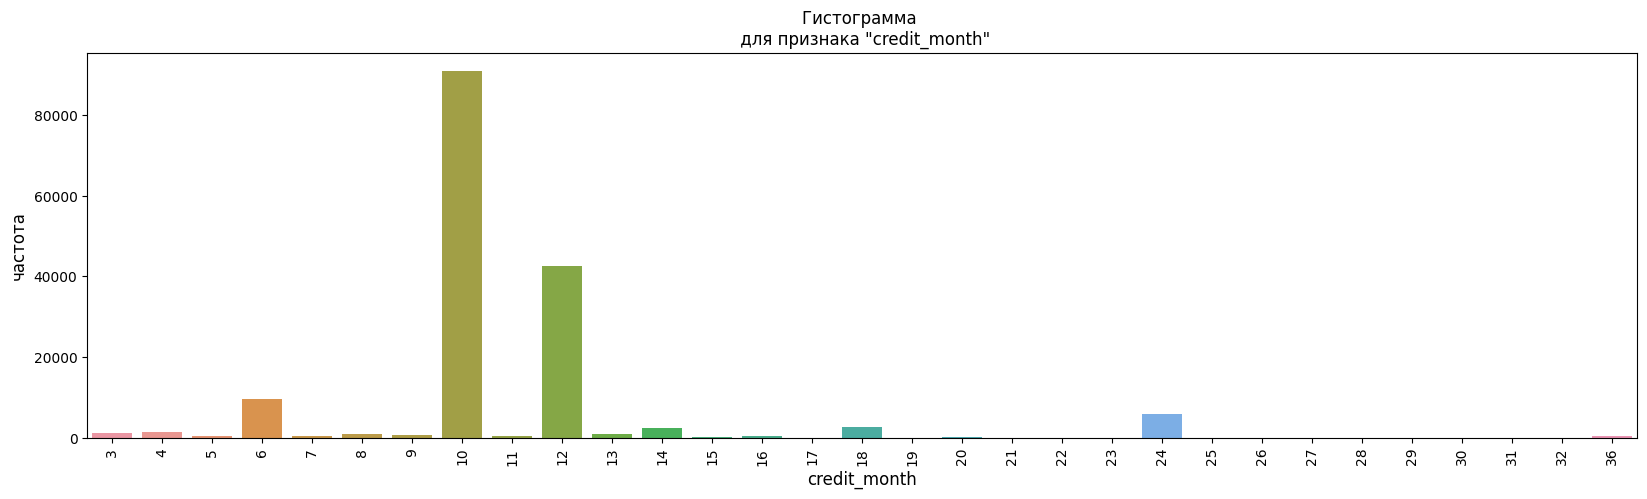

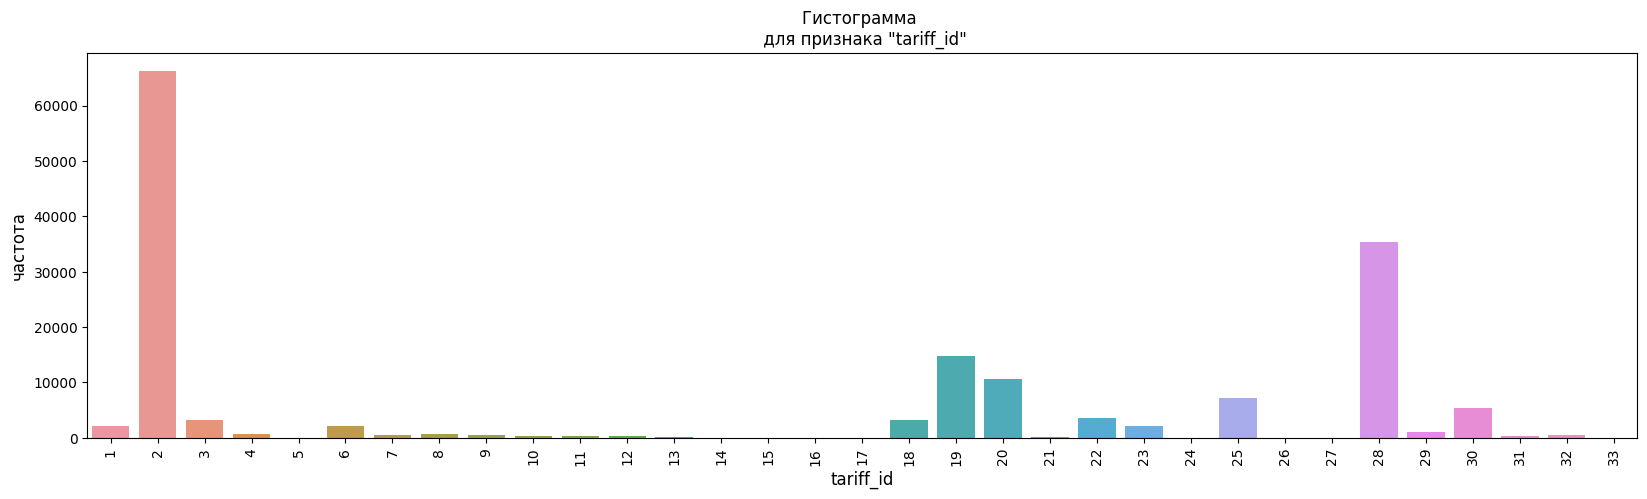

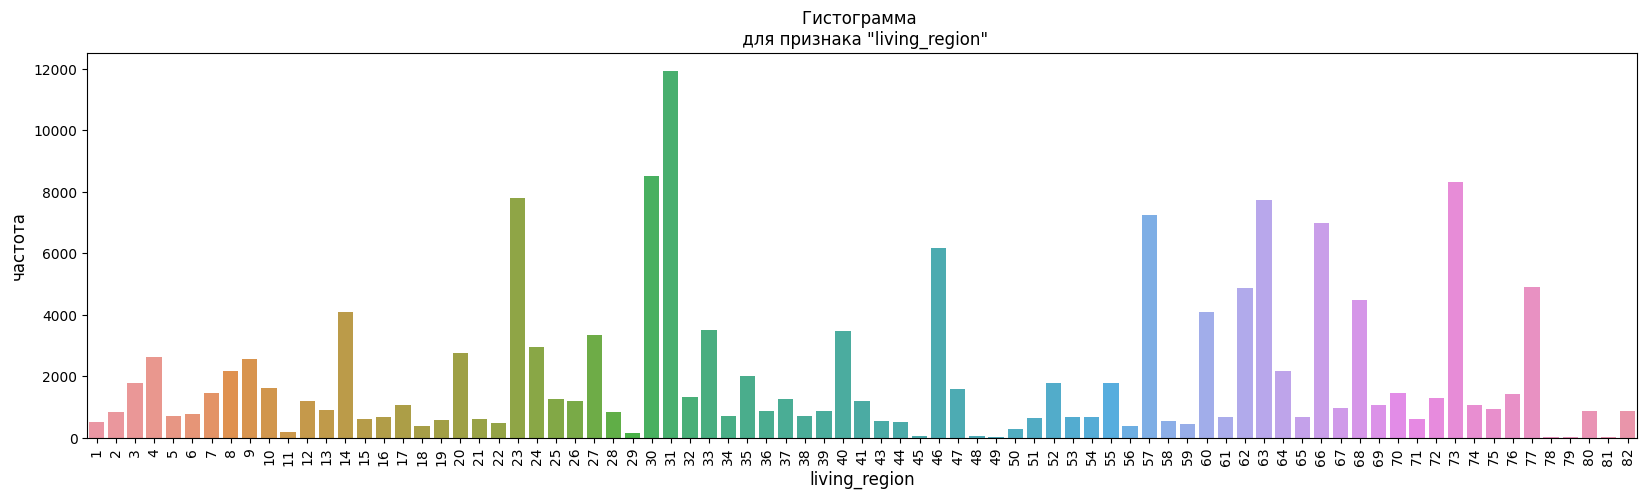

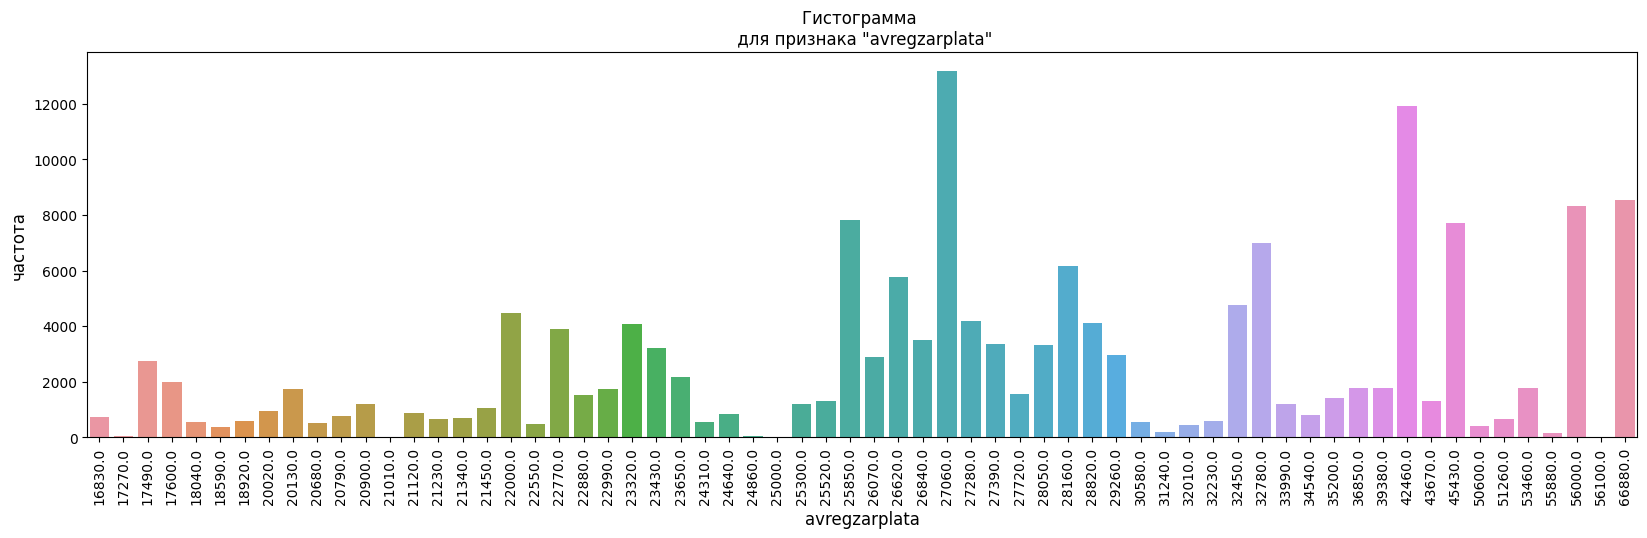

In [ ]:
cols_dist = ['age', 'job_position', 'credit_month',
            'tariff_id', 'living_region', 'avregzarplata']
for col in cols_dist:
    fig = plt.figure(figsize=(20,5))
    sns.countplot(x=col, data=df)
    plt.title(f'Гистограмма \n для признака "{col}"')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.ylabel('частота', fontsize = 12)
    plt.xticks(rotation=90)
    plt.show()

Признаки регион проживания и средняя зарплата по региону связаны - для каждого региона своя средняя зарплата

In [ ]:
#исследуем аномальные значения непрерывных признаков
#для подсчета значений нижнего и верхнего усов была предложена следующая функция
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

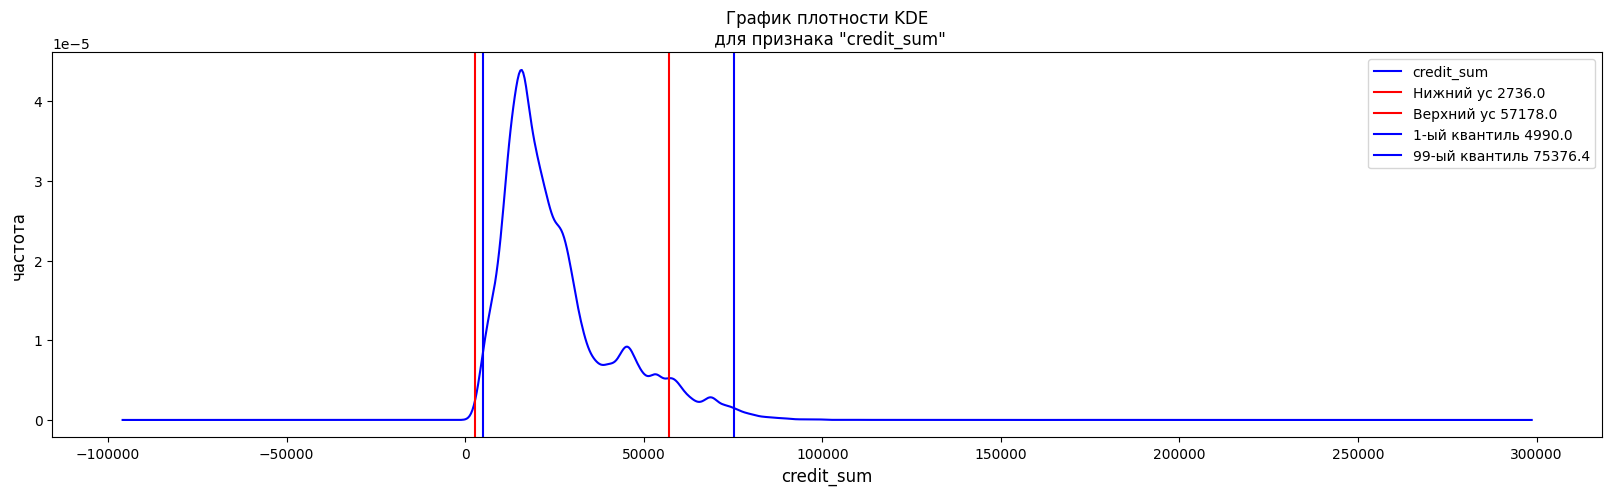

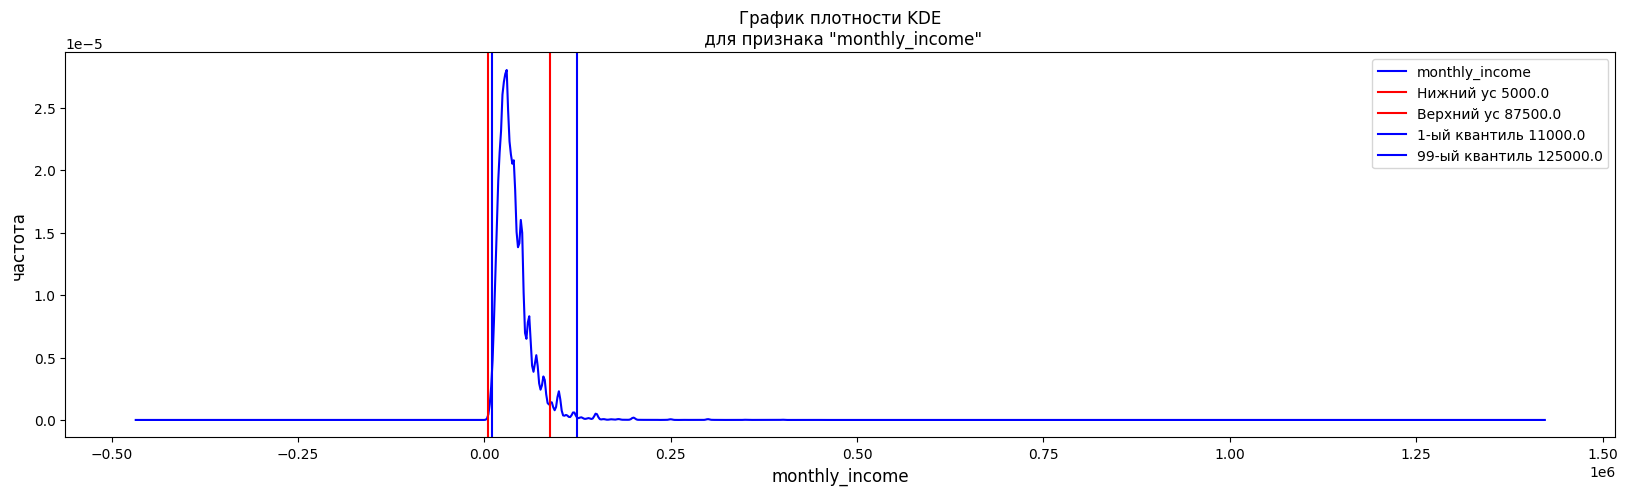

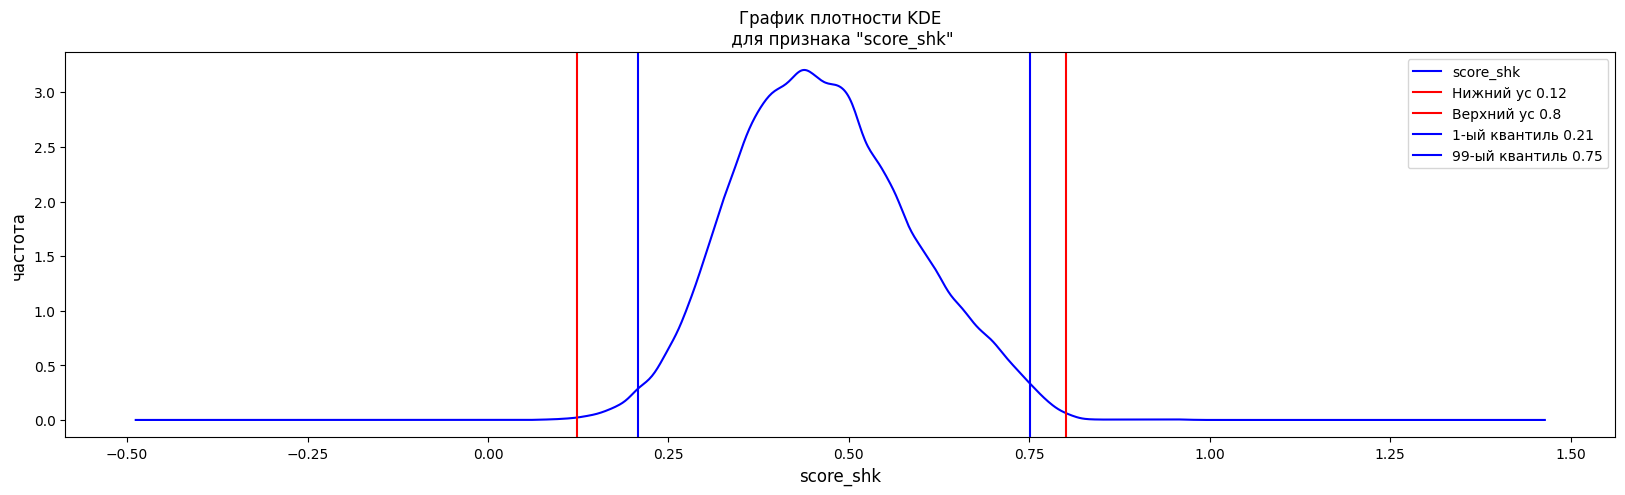

In [ ]:
vars_cont = ['credit_sum', 'monthly_income', 'score_shk']
for col in vars_cont:
    fig = plt.figure(figsize=(20,5))
    df[col].plot.kde(color='blue')
    plt.title(f'График плотности KDE\n для признака "{col}"',
              fontsize = 12)
    plt.ylabel('частота', fontsize = 12)
    plt.xlabel(col, fontsize = 12)
    value_low, value_upper = calc_boxplot(df[col])
    plt.axvline(value_low, color = 'red',
                label = 'Нижний ус {}'.format(np.round(value_low,2))
                )
    plt.axvline(value_upper, color = 'red',
                label = 'Верхний ус {}'.format(np.round(value_upper,2))
                )
    plt.legend(loc='upper right')
    per_1 = np.percentile(df[col], 1)
    per_99 = np.percentile(df[col], 99)
    plt.axvline(per_1, color = 'blue',
                label = '1-ый квантиль {}'.format(np.round(per_1,2))
                )
    plt.axvline(per_99, color = 'blue',
                label = '99-ый квантиль {}'.format(np.round(per_99,2))
                )
    plt.legend(loc='upper right')

In [ ]:
#для признака 'credit_sum' отсечем данные по нижнему усу и 99 му квантилю
#для признака 'monthly_income' отсечем данные по усам
#для признака 'score_shk' отсечем данные по усам

# фильтр на аномальные значения по интервальным признакам
filter_no_anomals = ((df['credit_sum'].between(2736, np.percentile(df['credit_sum'], 99)))
                 & ((df['monthly_income'].between(5000, 87500)))
                 & (df['score_shk'].between(0.12, 0.8)))

print(f'Потеряно данных {(1-df.loc[filter_no_anomals].shape[0] / df.shape[0]):.2%}')

Потеряно данных 5.03%


In [ ]:
df_no_anomals = df.loc[filter_no_anomals]
df_no_anomals

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48,3,15,59998.00,10,0.770249,2,28,23,8,25850.0,30000.0,1,1,0,2016-02-16 18:54:34
2,3,2,32,3,14,10728.00,12,0.459589,4,2,64,2,23430.0,23000.0,5,0,0,2015-01-27 18:57:19
3,4,1,27,2,14,12009.09,12,0.362536,2,2,8,8,23650.0,17000.0,2,0,0,2019-05-02 17:57:10
5,6,1,37,3,14,26788.00,10,0.484203,4,2,68,4,22000.0,30000.0,0,0,0,2015-10-15 18:04:55
7,8,1,26,4,14,47878.00,10,0.512525,2,2,31,7,42460.0,60000.0,3,0,0,2020-05-05 15:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,1,27,4,14,64867.00,12,0.535257,2,2,57,2,27060.0,40000.0,6,0,0,2018-11-24 18:35:26
170742,170743,1,24,3,14,17640.00,6,0.573287,4,28,63,3,45430.0,30000.0,1,0,0,2018-06-08 16:06:39
170743,170744,1,31,4,14,27556.47,10,0.416098,2,19,41,1,33990.0,40000.0,1,0,0,2016-09-24 12:18:06
170744,170745,1,53,2,10,6189.00,12,0.482595,4,2,39,2,22990.0,31000.0,2,0,0,2017-11-05 18:57:58


#Шаг 3. Провести исследовательский анализ данных:

исследовать распределения признаков;
исследовать возможные зависимости между признаками;

Распределения признаков исследованы в предыдущем пункте

<ipython-input-28-ab57c4aacc47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data = df_no_anomals.corr(), annot=True, square=True,
<ipython-input-28-ab57c4aacc47>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  linecolor='black', mask=np.triu(df.corr()))


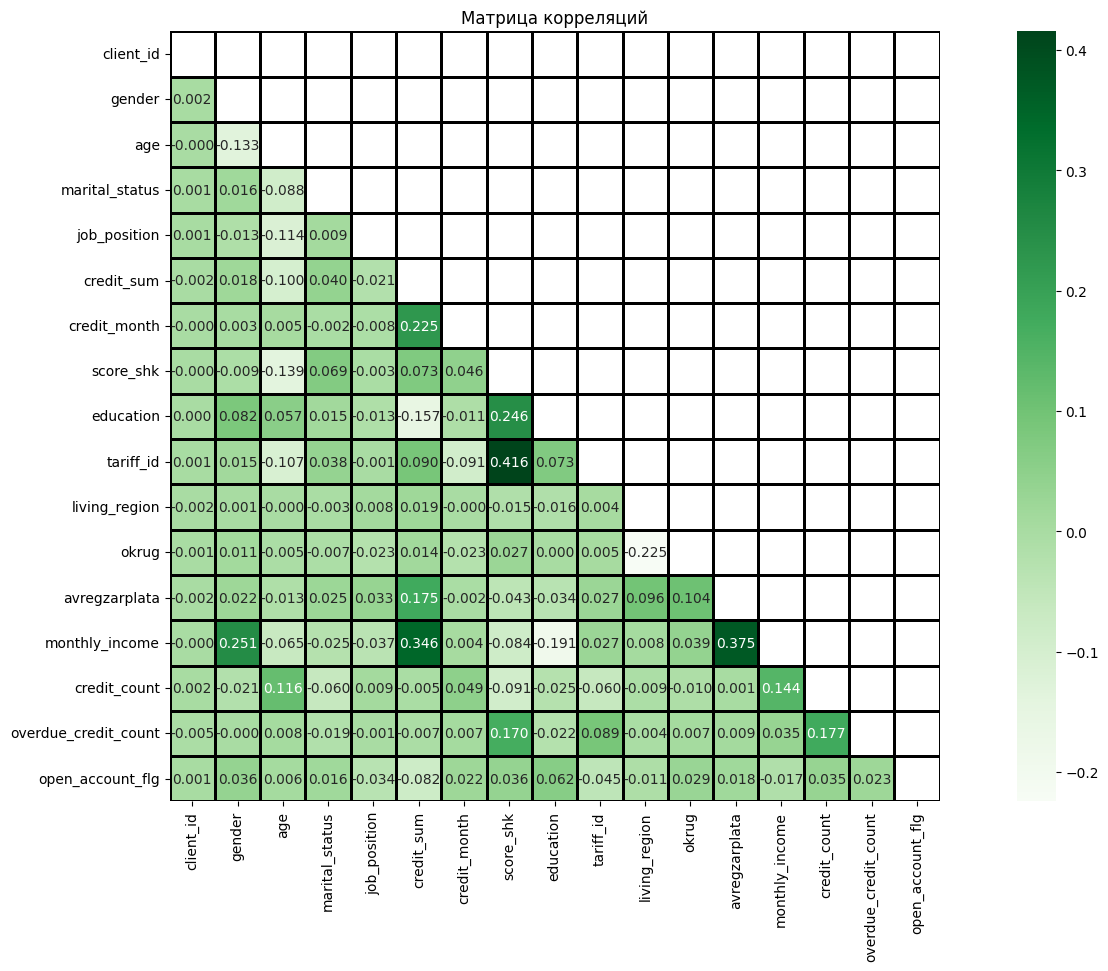

In [ ]:
# исследовать возможные зависимости между признаками;
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(data = df_no_anomals.corr(), annot=True, square=True,
                 cmap='Greens', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df.corr()))
plt.title('Матрица корреляций')
plt.show() #drop(columns=['client_id', 'date_bank'])

Величина коэффициента корреляции по
модулю показывает степень зависимости

• r=0 — нет никакой связи;

• r =0.01–0.3 — слабая связь;

• r =0.31–0.7 — умеренная связь;

• r =0.71–0.99 — сильная связь;

• r =1 — совершенная связь.

Из таблицы корреляции видим умеренную связь тарифа и оценочной шкалы, месячного дохода и региона проживания (по средней региональной зарплате), месячного дохода и суммы кредита

#Шаг 4. Отбор признаков и портреты клиентов:

исследовать признаки в разрезе групп;
выявить наличие значимых различий в значениям признаков в разрезе групп;
сформулировать и проверить гипотезы о равенстве значений показателей по группам

In [ ]:
#разделим на группы
df_with_card = df_no_anomals[df_no_anomals.open_account_flg == 1]
df_no_card = df_no_anomals[df_no_anomals.open_account_flg == 0]

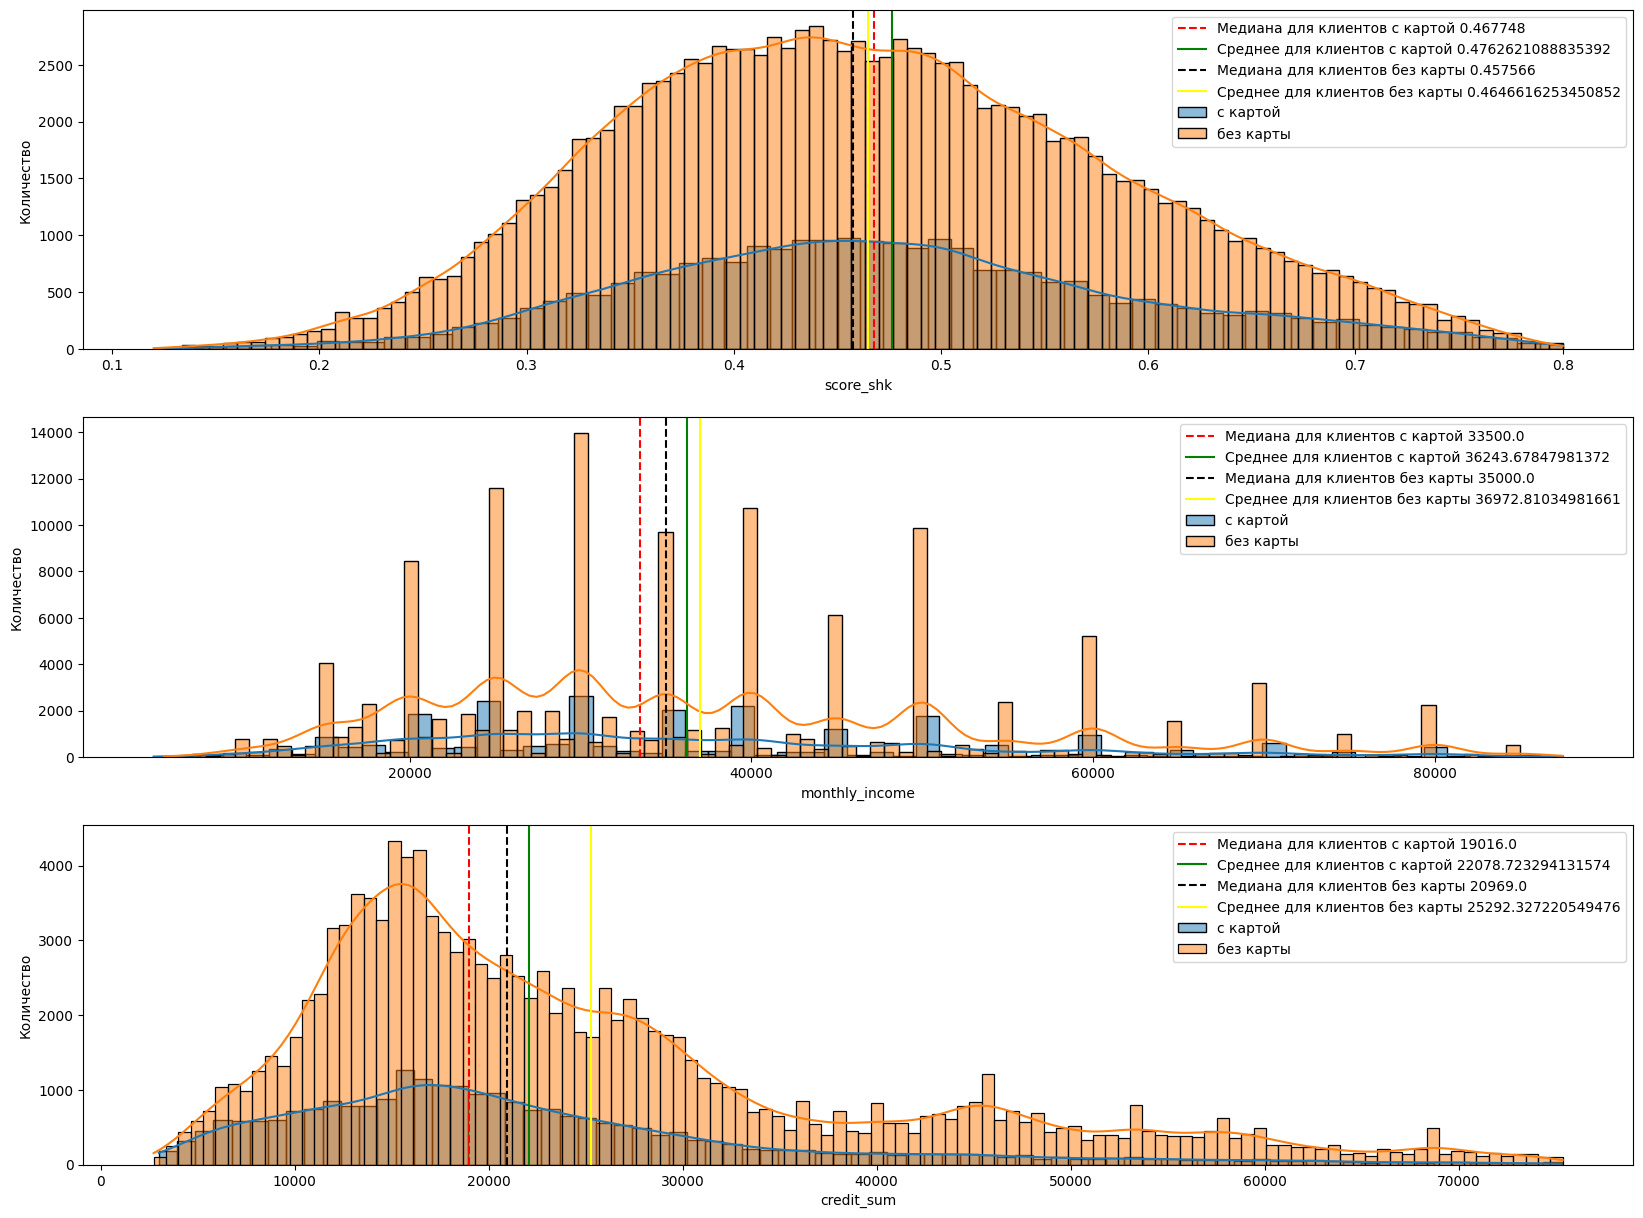

In [ ]:
# построим графики для непрерывных признаков
fig, axes = plt.subplots(3, figsize=(20,15))
i=0
vars_cont = set(vars_cont)

for i, col in enumerate(vars_cont):
    plt.subplot(3,1,i+1)
    ax = sns.histplot(df_with_card[col]
                      , label = 'с картой', kde=True)
    med = df_with_card[col].median()
    mean = df_with_card[col].mean()
    ax.axvline(med,
               color = 'red',
               label = f'Медиана для клиентов с картой {med}',
               linestyle = '--')
    ax.axvline(mean, color = 'green', label = f'Среднее для клиентов с картой {mean}')

    ax = sns.histplot(df_no_card[col]
                      , label = 'без карты', kde=True)
    med = df_no_card[col].median()
    mean = df_no_card[col].mean()
    ax.axvline(med, color = 'black', label = f'Медиана для клиентов без карты {med}',
               linestyle = '--')
    ax.axvline(mean, color = 'yellow', label = f'Среднее для клиентов без карты {mean}')

    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.legend()

In [ ]:
# проверка гипотез для непрерывных признаков
# по сумме кредита проверить гипотезу с картой / без карты

# формируем выборки
X = df_with_card['credit_sum']
Y = df_no_card['credit_sum']

#проверяем нормальность распределения
from scipy.stats import kstest
print(kstest(X, 'norm', args=(X.mean(), X.std())))

# т.к. 2.3044705226369525e-299 = p_value < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем

# проряем гипотезу в отношении параметров -- медиана
# H_0: сумма кредита клиентов с картой не отличается от суммы кредита клиентов без карты
# H_1: сумма кредита клиентов с картой отличается от суммы кредита клиентов без карты

from scipy.stats import kruskal
print(kruskal(X,Y))
# т.к. 1.7639982156986726e-200 = p_value < alpha = 0.05, то гипотезу H_0 отвергаем

KstestResult(statistic=0.11636147057064428, pvalue=2.3044705226369525e-299, statistic_location=24191.0, statistic_sign=1)
KruskalResult(statistic=912.6287739020222, pvalue=1.7639982156986726e-200)


In [ ]:
# проверка гипотез для непрерывных признаков
# по признаку оценочной (скоринговой) шкалы проверить гипотезу с картой / без карты

# формируем выборки
X = df_with_card['score_shk']
Y = df_no_card['score_shk']

#проверяем нормальность распределения
from scipy.stats import kstest
print(kstest(X, 'norm', args=(X.mean(), X.std())))

# т.к. 3.1058404753192875e-28 = p_value < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем

# проряем гипотезу в отношении параметров -- медиана
# H_0: сумма кредита клиентов с картой не отличается от суммы кредита клиентов без карты
# H_1: сумма кредита клиентов с картой отличается от суммы кредита клиентов без карты

from scipy.stats import kruskal
print(kruskal(X,Y))
# 1.5376474311695653e-38 = т.к. p_value < alpha = 0.05, то гипотезу H_0 отвергаем

KstestResult(statistic=0.03553449839446521, pvalue=3.1058404753192875e-28, statistic_location=0.512525, statistic_sign=1)
KruskalResult(statistic=168.54547637820895, pvalue=1.5376474311695653e-38)


In [ ]:
# проверка гипотез для непрерывных признаков
# по признаку месячного дохода проверить гипотезу с картой / без карты

# формируем выборки
X = df_with_card['monthly_income']
Y = df_no_card['monthly_income']

#проверяем нормальность распределения
from scipy.stats import kstest
print(kstest(X, 'norm', args=(X.mean(), X.std())))

# т.к. 1.3038867e-317 = p_value < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем

# проряем гипотезу в отношении параметров -- медиана
# H_0: сумма кредита клиентов с картой не отличается от суммы кредита клиентов без карты
# H_1: сумма кредита клиентов с картой отличается от суммы кредита клиентов без карты

from scipy.stats import kruskal
print(kruskal(X,Y))
# т.к. 9.439322578651619e-12 = p_value < alpha = 0.05, то гипотезу H_0 отвергаем

KstestResult(statistic=0.119849340645234, pvalue=1.3038867e-317, statistic_location=30000.0, statistic_sign=1)
KruskalResult(statistic=46.44153576482867, pvalue=9.439322578651619e-12)


In [ ]:
#анализ категориальных признаков в разрезе целевого признака
#разделим на группы
#df_with_card = df_no_anomals[df_no_anomals.open_account_flg == 1]
#df_no_card = df_no_anomals[df_no_anomals.open_account_flg == 0]

In [ ]:
# создадим сводные таблицы для категориальных признаков
vars_cat = ['gender', 'age', 'marital_status', 'job_position', 'credit_month', 'education', 'tariff_id', 'living_region', 'okrug', 'credit_count', 'overdue_credit_count']
for col in vars_cat:
    df_pt = pd.pivot_table(data = df_no_anomals,
               index = 'open_account_flg', #строки
               columns = col, #столбцы
               values = 'client_id', #значения
               aggfunc = 'count')
    print(f'---{col}---')
    print(np.round(df_pt/ df_pt.sum() * 100,2))
    print()

---gender---
gender                1      2
open_account_flg              
0                 84.71  82.05
1                 15.29  17.95

---age---
age                  18    19     20     21    22     23     24     25     26  \
open_account_flg                                                                
0                 28.57  55.0  62.09  73.67  77.7  79.66  81.99  82.95  84.15   
1                 71.43  45.0  37.91  26.33  22.3  20.34  18.01  17.05  15.85   

age                  27  ...     62    63     64     65     66     67     68  \
open_account_flg         ...                                                   
0                 84.12  ...  76.81  76.6  77.88  76.01  74.86  73.18  74.89   
1                 15.88  ...  23.19  23.4  22.12  23.99  25.14  26.82  25.11   

age                  69     70     71  
open_account_flg                       
0                 74.29  64.23  48.39  
1                 25.71  35.77  51.61  

[2 rows x 54 columns]

---marital_status---
m

In [ ]:
# на основе анализа сводных таблиц:
# проверить, что есть значимые отличия доли открывших карту по признаку пола
# проверить, что есть значимые отличия доли открывших карту по признаку возраста разделив на две группы: (18-20 лет + 70-71 год) и остальные
# проверить, что есть значимые отличия доли открывших карту по признаку семейный статус: статус номер 3 против всех остальных
# проверить, что есть значимые отличия доли открывших карту по признаку работа: группа номер 7 против всех остальных
# проверить, что есть значимые отличия доли открывших карту по признаку образование: группа номер 1 против всех остальных
# проверить, что есть значимые отличия доли открывших карту по признаку просроченных кредитов
# другие гипотезы, их слишком много

Проверим, для примера, гипотезу, что есть значимые отличия между долями клиентов
открывших карту по признаку просроченных кредитов:

overdue_credit_count=0 VS overdue_credit_count=(1, 2, 3)

In [ ]:
# H0: нет статистически значимой разницы между долями клиентов из обеих групп
# H1: имеется статистически значимая разница между долями клиентов из обеих групп

n1 = df_no_anomals[df_no_anomals['overdue_credit_count'] == 0].shape[0]
n2 = df_no_anomals[df_no_anomals['overdue_credit_count'].isin([1, 2, 3])].shape[0]
m1 = df_no_anomals[(df_no_anomals['overdue_credit_count'] == 0)
                    & (df_no_anomals['open_account_flg'] == 1)].shape[0]
m2 = df_no_anomals[(df_no_anomals['overdue_credit_count'].isin([1, 2, 3]))
                       & (df_no_anomals['open_account_flg'] == 1)].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------
